# Mel-Frequency Cepstral Coefficients

In [1]:
import librosa
import librosa.display
import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
DATA_PATH = Path("__file__").resolve().parents[1] / "data" / "audio-signal-processing"

audio_file = DATA_PATH / "debussy.wav"

In [4]:
signal, sr = librosa.load(audio_file)

In [5]:
signal.shape

(661500,)

## Extracting MFCCs

In [6]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
mfccs.shape

(13, 1292)

## Visualising MFCCs

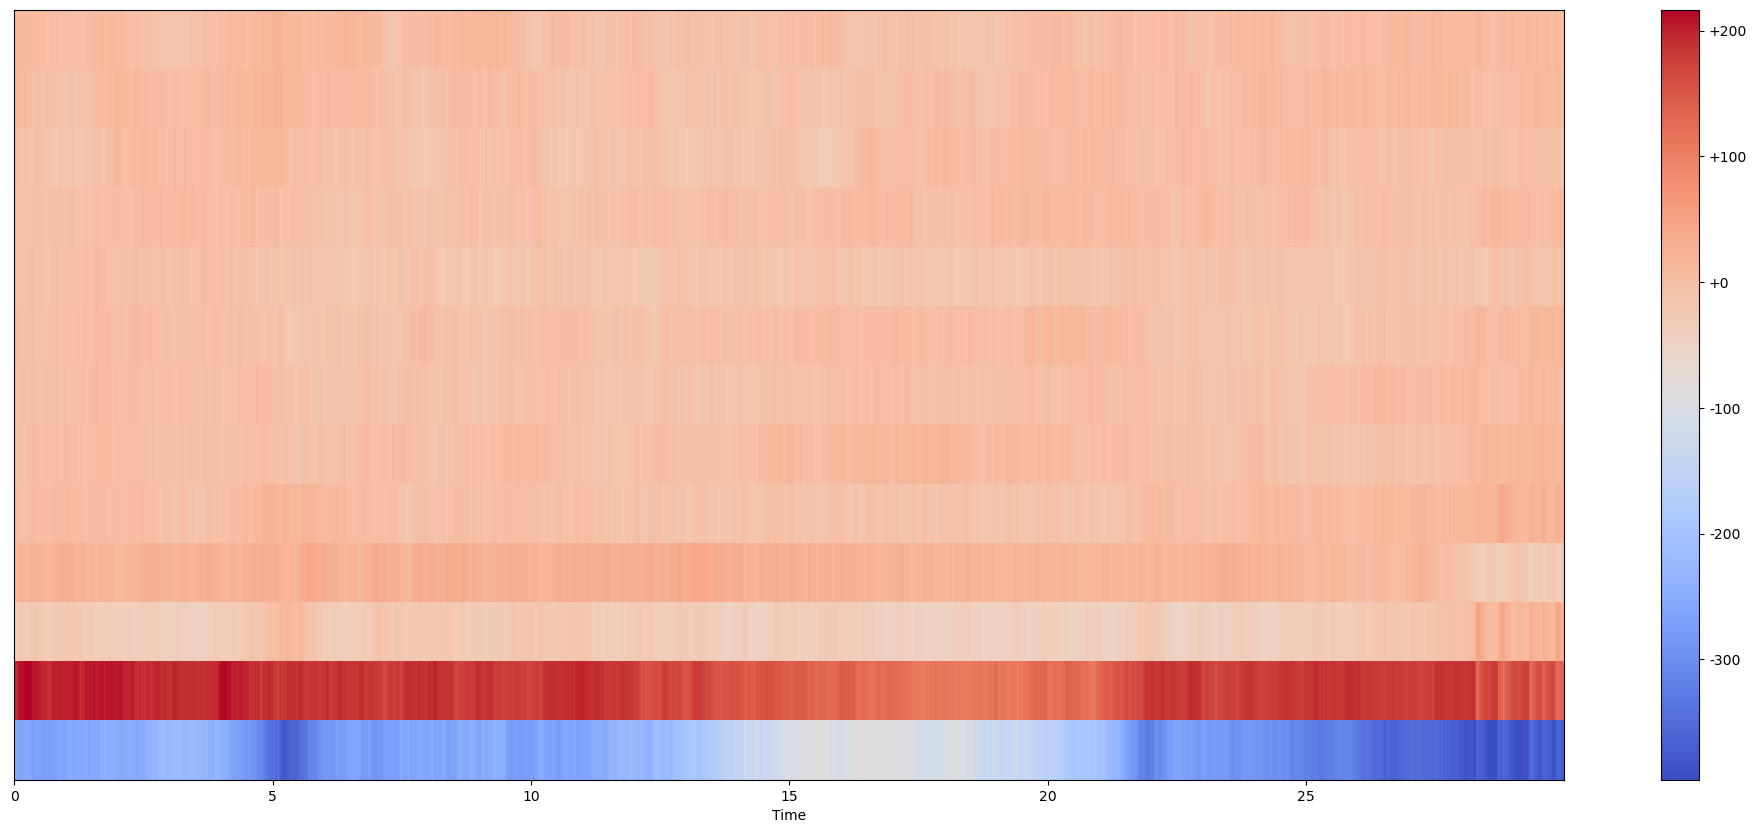

In [7]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Computing first / second MFCCs derivatives
- How MFCCs change over the time

In [10]:
delta_mfccs = librosa.feature.delta(mfccs)
delta_mfccs.shape

(13, 1292)

In [11]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
delta2_mfccs.shape

(13, 1292)

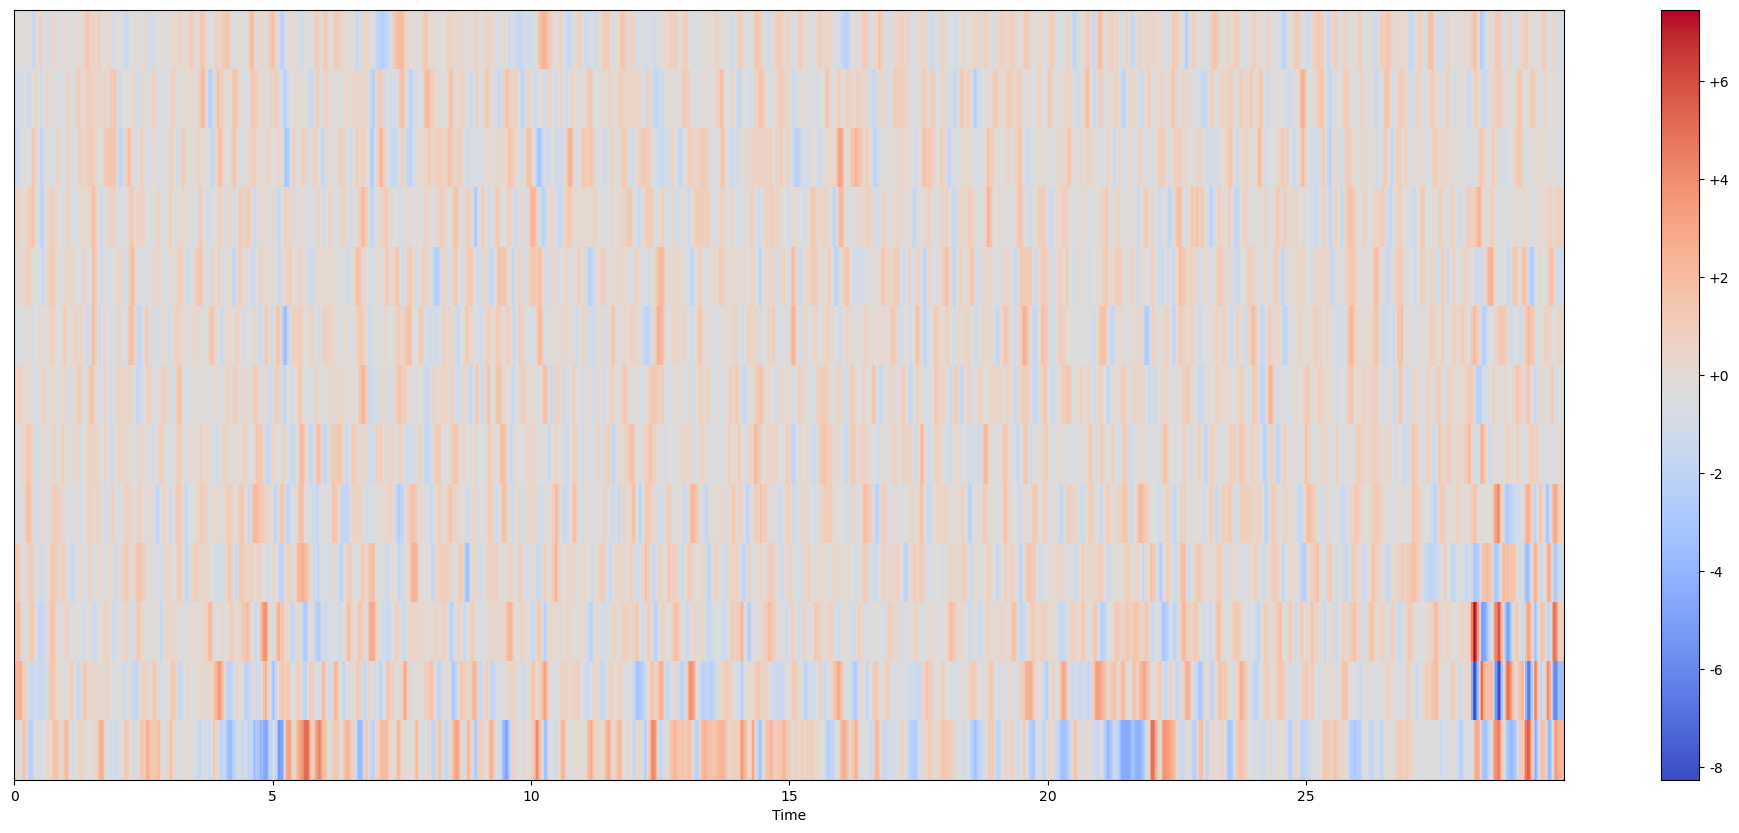

In [12]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

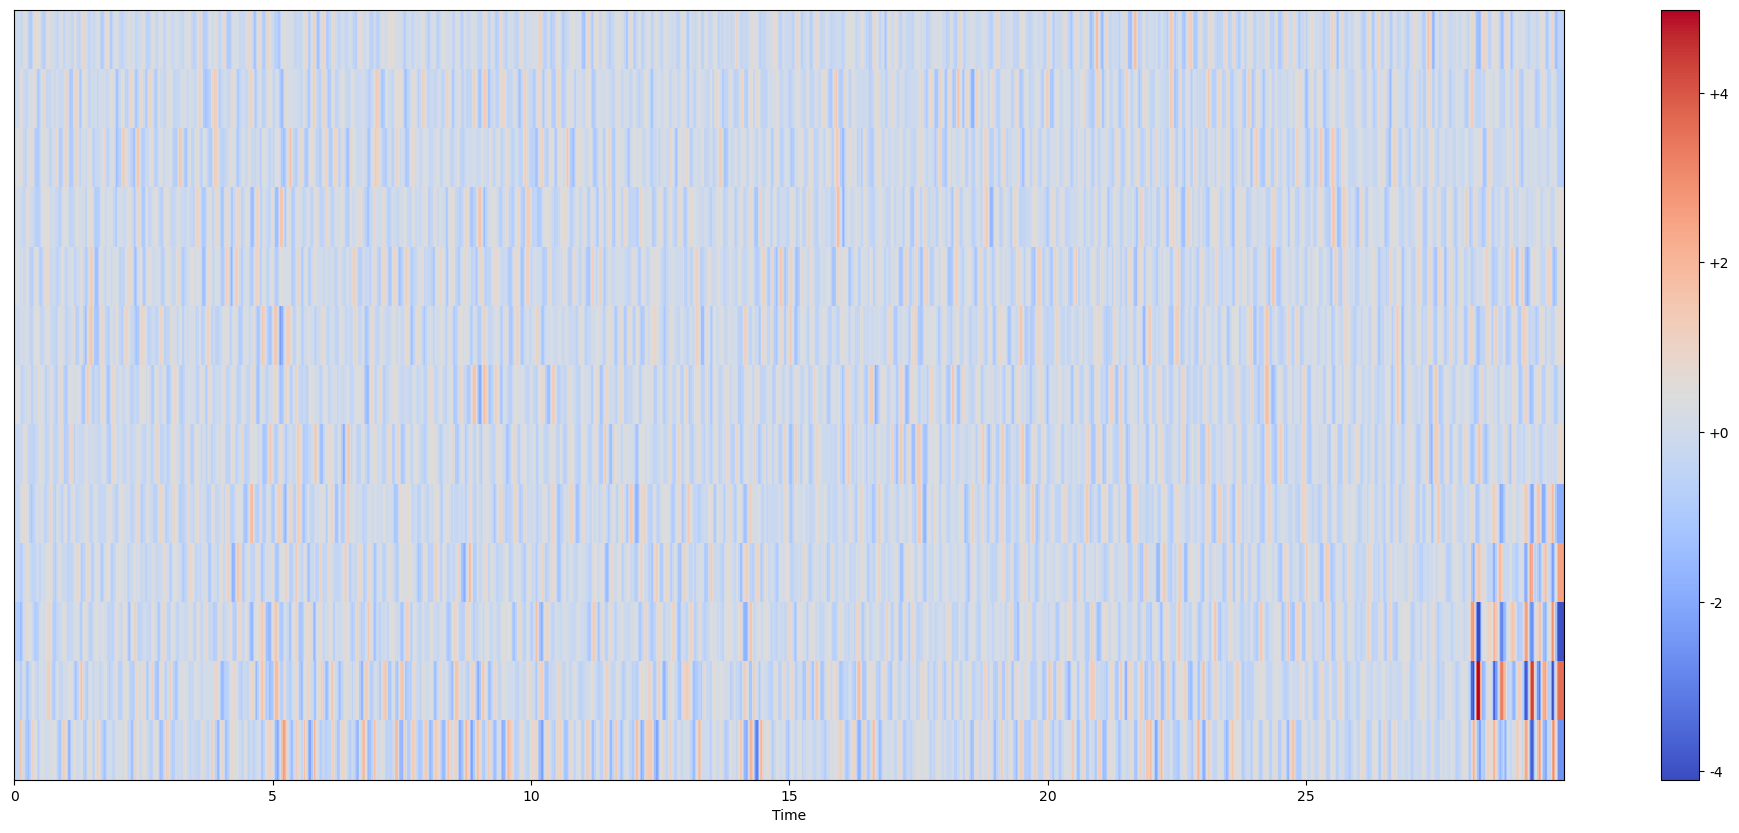

In [13]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [14]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
mfccs_features.shape

(39, 1292)